In [4]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
relu_result_path = "/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/experiments/results/relu_overlap_differences"

In [7]:
weights_path = os.path.join(relu_result_path, "learner_weights")

In [10]:
saved_weight_files = os.listdir(weights_path)

In [11]:
saved_weight_files

['switch_15_step_433657_saved_weights.pt',
 'switch_9_step_346634_saved_weights.pt',
 'switch_7_step_318119_saved_weights.pt',
 'switch_1_step_60823_saved_weights.pt',
 'switch_4_step_243659_saved_weights.pt',
 'switch_11_step_375796_saved_weights.pt',
 'switch_12_step_390566_saved_weights.pt',
 'switch_5_step_281824_saved_weights.pt',
 'switch_8_step_333048_saved_weights.pt',
 'switch_6_step_304330_saved_weights.pt',
 'switch_10_step_361819_saved_weights.pt',
 'switch_2_step_128083_saved_weights.pt',
 'switch_13_step_404451_saved_weights.pt',
 'switch_14_step_419453_saved_weights.pt',
 'switch_3_step_201744_saved_weights.pt']

In [22]:
sorted_saved_weight_files = sorted(saved_weight_files, key=lambda x: int(x.split("switch_")[1].split("_step")[0]))

In [23]:
full_sorted_saved_weight_files = [os.path.join(weights_path, f) for f in sorted_saved_weight_files]

In [24]:
full_sorted_saved_weight_files

['/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/experiments/results/relu_overlap_differences/learner_weights/switch_1_step_60823_saved_weights.pt',
 '/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/experiments/results/relu_overlap_differences/learner_weights/switch_2_step_128083_saved_weights.pt',
 '/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/experiments/results/relu_overlap_differences/learner_weights/switch_3_step_201744_saved_weights.pt',
 '/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/experiments/results/relu_overlap_differences/learner_weights/switch_4_step_243659_saved_weights.pt',
 '/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/experiments/results/relu_overlap_differences/learner_weights/switch_5_step_281824_saved_weights.pt',
 '/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/experiments/results/relu_overlap_differences/learner_weights/switch_6_

In [26]:
loaded_weights = [torch.load(weights) for weights in full_sorted_saved_weight_files]

In [27]:
loaded_weights[0]

OrderedDict([('layers.0.weight',
              tensor([[-1.5538, -0.1148,  0.1971,  ...,  0.5758,  0.5018, -0.0809],
                      [-1.3516, -0.1043,  0.1738,  ...,  0.4834,  0.4419, -0.0759]])),
             ('heads.0.weight', tensor([[0.5729, 0.4982]])),
             ('heads.1.weight', tensor([[0., 0.]]))])

In [78]:
loaded_weights[-1]

OrderedDict([('layers.0.weight',
              tensor([[-0.5048, -0.1396,  0.4335,  ...,  0.7363, -0.4869,  0.5384],
                      [-2.1094, -0.1930,  0.3059,  ...,  0.7764,  0.7019, -0.1593]])),
             ('heads.0.weight', tensor([[2.3711e-05, 7.3160e-01]])),
             ('heads.1.weight', tensor([[-6.8054e-01,  7.1394e-05]]))])

In [33]:
np.mean(loaded_weights[0]['layers.0.weight'].numpy())
np.std(loaded_weights[0]['layers.0.weight'].numpy())

0.55929136

In [34]:
layer_0s = [weights['layers.0.weight'].numpy() for weights in loaded_weights]

In [35]:
layer_0_means = [np.mean(layer_0) for layer_0 in layer_0s]
layer_0_stds = [np.std(layer_0) for layer_0 in layer_0s]

In [36]:
layer_0_means

[-0.03323478,
 -0.017947925,
 -0.04283209,
 -0.02951172,
 -0.03675889,
 -0.033963762,
 -0.034190375,
 -0.034042887,
 -0.0341063,
 -0.03405332,
 -0.034066737,
 -0.03404173,
 -0.034043863,
 -0.034037046,
 -0.034038886]

In [37]:
layer_0_stds

[0.55929136,
 0.7123256,
 0.7000626,
 0.77108,
 0.81422466,
 0.82212204,
 0.82280374,
 0.822386,
 0.8225826,
 0.8224595,
 0.82250684,
 0.82246155,
 0.8224776,
 0.8224627,
 0.8224687]

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


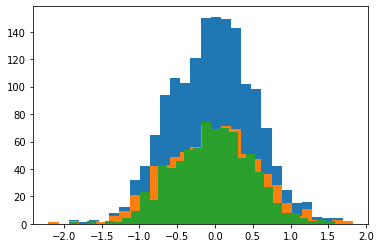

In [63]:
fig = plt.figure()
plt.hist(np.concatenate(layer_0s[0]), bins=30)
plt.hist(layer_0s[0][0], bins=30)
plt.hist(layer_0s[0][1], bins=30)
fig.show()

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


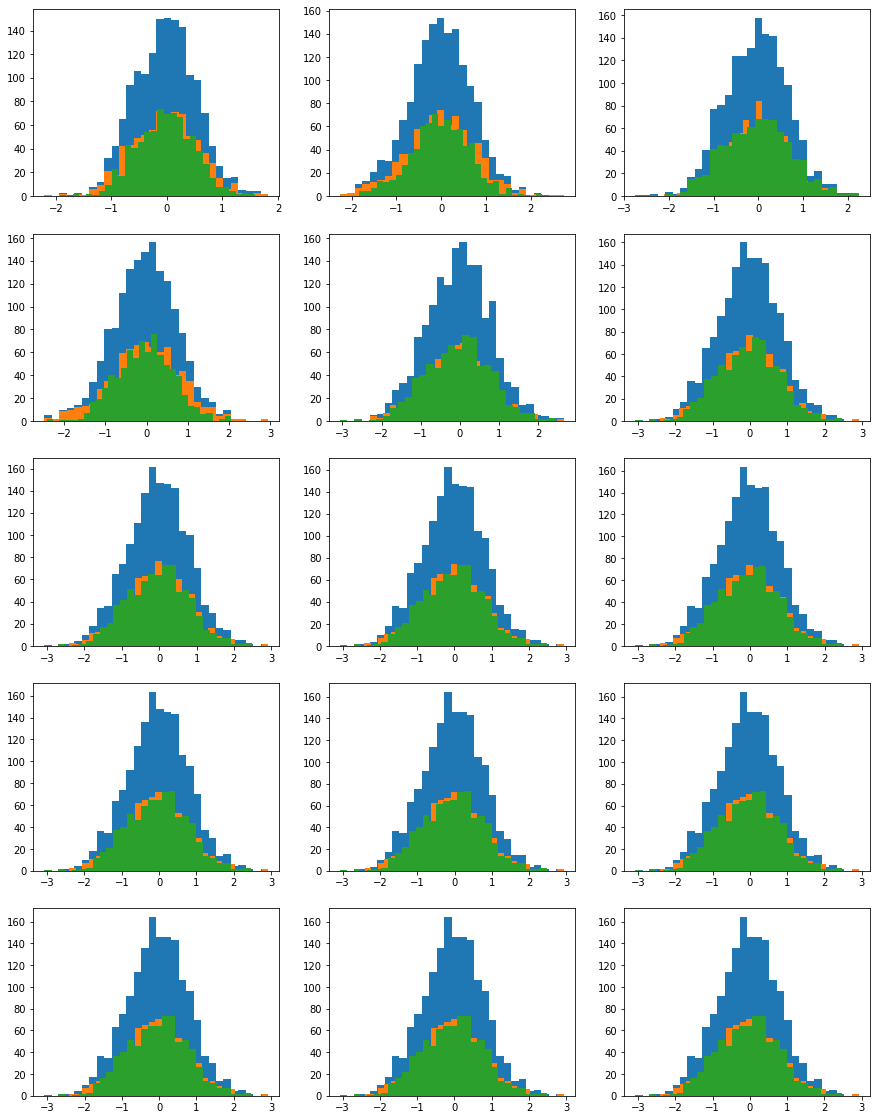

In [64]:
fig, axes = plt.subplots(5, 3, figsize=(5 * 3, 4 * 5))
for i in range(5):
    for j in range(3):
        layer_weights = layer_0s[3 * i + j]
        axes[i][j].hist(np.concatenate(layer_weights), bins=30, alpha=1)
        axes[i][j].hist(layer_weights[0], bins=30, alpha=1)
        axes[i][j].hist(layer_weights[1], bins=30, alpha=1)
fig.show()

In [66]:
layer_0_weight_differences = [layer_0s[i+1] - layer_0s[i] for i in range(len(layer_0s) - 1)]

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


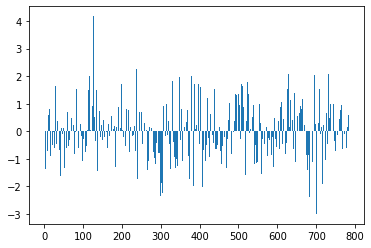

In [72]:
fig = plt.figure()
plt.bar(range(len(layer_0_weight_differences[0][0])), layer_0_weight_differences[0][0])
fig.show()

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


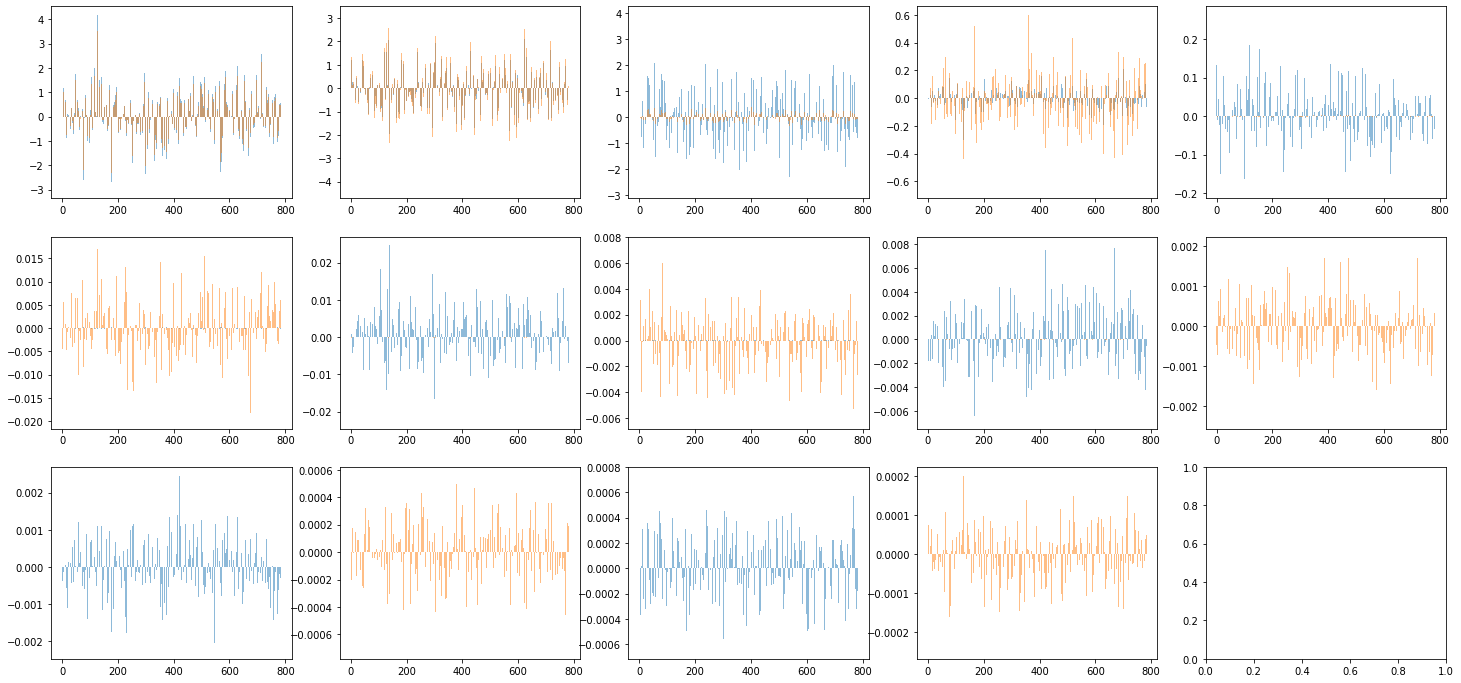

In [76]:
fig, axes = plt.subplots(3, 5, figsize=(5 * 5, 4 * 3))
for i in range(3):
    for j in range(5):
        if 5 * i + j < len(layer_0_weight_differences):
            layer_weight_differences = layer_0_weight_differences[5 * i + j]
            diff_0 = layer_weight_differences[0]
            diff_1 = layer_weight_differences[1]
            axes[i][j].bar(range(len(diff_0)), diff_0, alpha=0.5)
            axes[i][j].bar(range(len(diff_1)), diff_1, alpha=0.5)
fig.show()

## Comments

In the first switches, the weight changes are almost identical for both halves of the weight matrix i.e no specialisation, both halves are being used in the same way. Note there is a small difference - this could be crucial? Over time this difference increases but the direction of each weight change are still the same. The first time a decoupling shows is the fourth graph along in row one. Then eventually full orthogonalisation is reached and only one half changes per task epoch. One thing to test would be to have identical weight initialisations in both halves of the weight matrix and see if we still get the decoupling. My intuition is that the decoupling / rate of decoupling is a function of the initial student overlap. 